## TEXT_MINING_BANK_REVIEWS_ANALYSIS
###### Definition of Target and Outcome Window
       Central banks collecting information about customer satisfaction with the services provided by different bank. Also collects the information about the complaints. 
       The objective of the case study is to analyze customer reviews and predict customer satisfaction with the reviews
###### Data Pre-Processing - 
    - Applying regular expressions to clean data
    - Removing stopwords
    - Applying Lemmatization
###### Model Build and Model Evaluation
    - Building TF-IDF model 
    - Train and Test split
    - Model used :- Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier, XGB Classifier, KNN Classifier, 
                    Decision Tree, Support Vector Classifier  
    - Evaluation method:- Confusion Matrix 
    - Scoring:- Accuracy , Precision, Recall, F1_score

### Importing Libraries

In [35]:
import nltk
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
#Downloading nltk packages. (Can be skipped if already downloaded)
nltk.download('all')

### Importing data

In [53]:
df =  pd.read_excel('BankReviews.xlsx')

In [54]:
df

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
...,...,...,...,...
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank


In [55]:
#Checking for null values
df.isna().sum()

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

In [56]:
#Columns dropped as they are not required
df.drop(columns = ['Date','BankName'],inplace=True)

In [57]:
df

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...
...,...,...
500,1,\r\nI never write reviews but had to this time...
501,1,\r\nIt all started when Bob G ran a credit che...
502,1,\r\nWhat a horrible experience. We have excell...
503,1,"\r\nRep was extremely professional, friendly, ..."


In [58]:
df.shape

(505, 2)

In [72]:
df.Stars.unique()

array([5, 1], dtype=int64)

In [59]:
#Splitting dependent and independent variables
x = df.Reviews
y = df.Stars

In [60]:
x[0]

'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!'

In [61]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Stars, dtype: int64

### Cleaning reviews

#### Applying regular expressions to clean data  

In [62]:
clean_x = []
for i in range(0, len(x)):
    review = re.sub(r'\W', ' ', str(x[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    clean_x.append(review)    

In [63]:
clean_x[0]

'great job wyndham capital each person was professional and helped us move through our refinance process smoothly thank you '

#### Removing Stopwords

In [64]:
stopwords = nltk.corpus.stopwords

for i in range(len(clean_x)):
    words = nltk.word_tokenize(clean_x[i])
    words = [word for word in words if word not in stopwords.words('english')]
    clean_x[i] = ' '.join(words)   

In [65]:
clean_x[0]

'great job wyndham capital person professional helped us move refinance process smoothly thank'

#### Applying Lemmatization

In [66]:
lemmatizer = nltk.stem.WordNetLemmatizer()

for i in range(len(clean_x)):
    words = nltk.word_tokenize(clean_x[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    clean_x[i] = ' '.join(words)   

In [67]:
clean_x[0]

'great job wyndham capital person professional helped u move refinance process smoothly thank'

### Model Build and Evaluation

#### TF-IDF

In [68]:
# Creating the Tf-Idf Model
vector = TfidfVectorizer()

clean_x_new = vector.fit_transform(clean_x).toarray()

In [69]:
clean_x_new

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08238826, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
# Splitting the dataset into the Training set and Test set
text_train, text_test, sent_train, sent_test = train_test_split(clean_x_new, y, test_size = 0.20, random_state = 0)

In [19]:
# Function to build and evaluate other models
def model_build_cum_evaluation(model,x,y,x_t,y_t):
    
    #Fitting model
    model.fit(x,y)
    
    #Predicting values for train_x and test_x
    model_train_predict = model.predict(x)
    model_predict = model.predict(x_t)
    
    print("Training scores")
    print("Accuracy score is ",metrics.accuracy_score(y,model_train_predict))
    print("Precision score is" ,metrics.precision_score(y,model_train_predict))
    print("Recall score is ",metrics.recall_score(y,model_train_predict))
    print("F1 score is ",metrics.f1_score(y,model_train_predict))
    plt.figure(figsize=(4,3))
    cm = metrics.confusion_matrix( y,model_train_predict )
    sb.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['5','1'], yticklabels=['5','1'])
    plt.show()
    
    print("Testing scores")
    print("Accuracy score is ",metrics.accuracy_score(y_t,model_predict))
    print("Precision score is" ,metrics.precision_score(y_t,model_predict))
    print("Recall score is ",metrics.recall_score(y_t,model_predict))
    print("F1 score is ",metrics.f1_score(y_t,model_predict))
    plt.figure(figsize=(4,3))
    dm = metrics.confusion_matrix(y_t,model_predict)
    sb.heatmap(dm, annot=True,  fmt='.2f',xticklabels=['5','1'], yticklabels=['5','1'])
    plt.show()

#### Logistic Regression

In [20]:
lr = LogisticRegression(n_jobs=-1)

Logistic Regression
Training scores
Accuracy score is  0.8910891089108911
Precision score is 1.0
Recall score is  0.35294117647058826
F1 score is  0.5217391304347826


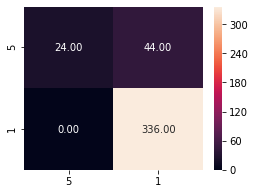

Testing scores
Accuracy score is  0.7920792079207921
Precision score is 1.0
Recall score is  0.2222222222222222
F1 score is  0.3636363636363636


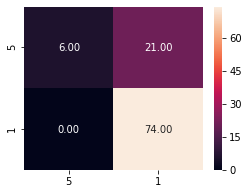

In [21]:
print('Logistic Regression')
model_build_cum_evaluation(lr, text_train, sent_train, text_test, sent_test)

#### Random Forest Classifier 

In [22]:
rfc = RandomForestClassifier(n_jobs=-1)

Random Forest Classifier
Training scores
Accuracy score is  0.9975247524752475
Precision score is 0.9855072463768116
Recall score is  1.0
F1 score is  0.9927007299270074


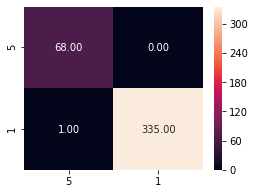

Testing scores
Accuracy score is  0.8316831683168316
Precision score is 1.0
Recall score is  0.37037037037037035
F1 score is  0.5405405405405406


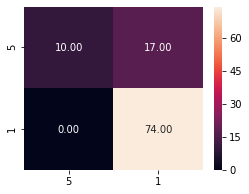

In [23]:
print('Random Forest Classifier')
model_build_cum_evaluation(rfc, text_train, sent_train, text_test, sent_test)

#### Gradient Boosting Classifier

In [24]:
gbc = GradientBoostingClassifier()

Gradient Boosting Classifier
Training scores
Accuracy score is  0.9975247524752475
Precision score is 1.0
Recall score is  0.9852941176470589
F1 score is  0.9925925925925926


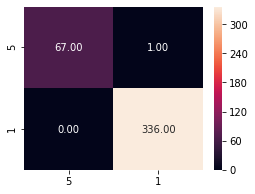

Testing scores
Accuracy score is  0.8514851485148515
Precision score is 0.9285714285714286
Recall score is  0.48148148148148145
F1 score is  0.6341463414634146


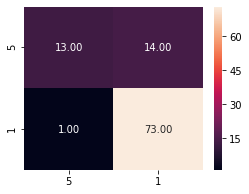

In [25]:
print('Gradient Boosting Classifier')
model_build_cum_evaluation(gbc, text_train, sent_train, text_test, sent_test)

#### XGB Classifier 

In [26]:
xgb = XGBClassifier(n_jobs=-1)

XGB Classifier
Training scores
Accuracy score is  0.9801980198019802
Precision score is 0.96875
Recall score is  0.9117647058823529
F1 score is  0.9393939393939394


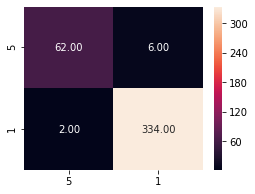

Testing scores
Accuracy score is  0.8514851485148515
Precision score is 0.9285714285714286
Recall score is  0.48148148148148145
F1 score is  0.6341463414634146


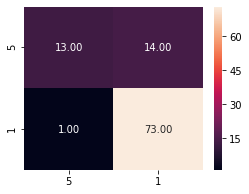

In [27]:
print('XGB Classifier')
model_build_cum_evaluation(xgb, text_train, sent_train, text_test, sent_test)

#### KNN classifier 

In [28]:
k = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

KNN Classifier
Training scores
Accuracy score is  0.9653465346534653
Precision score is 0.95
Recall score is  0.8382352941176471
F1 score is  0.890625


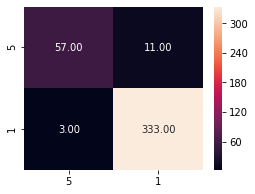

Testing scores
Accuracy score is  0.9207920792079208
Precision score is 0.9130434782608695
Recall score is  0.7777777777777778
F1 score is  0.84


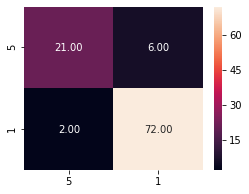

In [29]:
print('KNN Classifier')
model_build_cum_evaluation(k, text_train, sent_train, text_test, sent_test)

#### Decision Tree 

In [30]:
dt = DecisionTreeClassifier()

Decision Tree Classifier
Training scores
Accuracy score is  0.9975247524752475
Precision score is 0.9855072463768116
Recall score is  1.0
F1 score is  0.9927007299270074


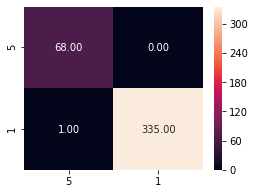

Testing scores
Accuracy score is  0.8316831683168316
Precision score is 0.75
Recall score is  0.5555555555555556
F1 score is  0.6382978723404256


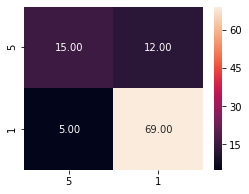

In [31]:
print('Decision Tree Classifier')
model_build_cum_evaluation(dt, text_train, sent_train, text_test, sent_test)

#### Support Vector Classifer

In [32]:
svc = SVC()

Support Vector Classifier
Training scores
Accuracy score is  0.995049504950495
Precision score is 1.0
Recall score is  0.9705882352941176
F1 score is  0.9850746268656716


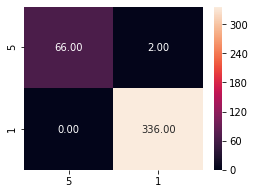

Testing scores
Accuracy score is  0.8316831683168316
Precision score is 1.0
Recall score is  0.37037037037037035
F1 score is  0.5405405405405406


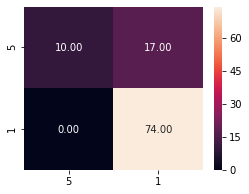

In [33]:
print('Support Vector Classifier')
model_build_cum_evaluation(svc, text_train, sent_train, text_test, sent_test)

    From the data given above we can conclude that best result is given by KNN classifer.

### Final Prediction

In [34]:
#Concatenating predicted values with original data:

predicted = pd.DataFrame(k.predict(clean_x_new),columns=['predicted_values'])
  
final_output = pd.concat([df, predicted], axis=1)

final_output.head(10)

,Stars,Reviews,predicted_values
0,5,"Great job, Wyndham Capital! Each person was pr...",5
1,5,Matthew Richardson is professional and helpful...,5
2,5,We had a past experience with Wyndham Mortgage...,5
3,5,We have been dealing with Brad Thomka from the...,5
4,5,I can't express how grateful I am for the supp...,5
5,5,I had the pleasure of working with Wyndham Cap...,5
6,5,My experience with Mattison was beyond greatly...,5
7,5,Patrick answered all my questions by email imm...,5
8,5,I loved working with this group of people! The...,5
9,5,Great web interface for both the loan applicat...,5
